In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:0000:0100:01


In [3]:
from ultralytics import YOLO
print("YOLO installed successfully")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO installed successfully


In [8]:
import yaml

# Define your data as a Python dictionary
data = {
    'train': '/kaggle/input/dosro-yolo-pothole/train/images',
    'val': '/kaggle/input/dosro-yolo-pothole/valid/images',
    'nc': 1,
    'names': ['potholes']
}

# Open a file in write mode and dump the dictionary to it as YAML
with open('custom_config.yaml', 'w') as f:
    yaml.dump(data, f)


In [10]:
!cat /kaggle/working/custom_config.yaml


names:
- potholes
nc: 1
train: /kaggle/input/dosro-yolo-pothole/train/images
val: /kaggle/input/dosro-yolo-pothole/valid/images


In [11]:
model = YOLO("yolov8n.pt")


In [12]:
model.train(
    data="/kaggle/working/custom_config.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/custom_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7965abfa9790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

results = model.predict(
    source="/kaggle/input/dosro-yolo-pothole/test/images",
    save=True,
    conf=0.25
)



image 1/174 /kaggle/input/dosro-yolo-pothole/test/images/021_png.rf.10df3c2d0c2021c7dd7f90830d1c8ed6.jpg: 352x640 6 potholess, 38.6ms
image 2/174 /kaggle/input/dosro-yolo-pothole/test/images/032_png.rf.68117aea420bfaf25ab23451efd2fceb.jpg: 352x640 6 potholess, 6.0ms
image 3/174 /kaggle/input/dosro-yolo-pothole/test/images/036_png.rf.c93894e4c07a11f005eb7943fcc47b8b.jpg: 352x640 6 potholess, 5.8ms
image 4/174 /kaggle/input/dosro-yolo-pothole/test/images/043_png.rf.c4e7c686e1c9dfa712e8f8912dffe03e.jpg: 352x640 6 potholess, 6.5ms
image 5/174 /kaggle/input/dosro-yolo-pothole/test/images/047_png.rf.bb843ac1fc5bd3c1cf373c43e3c264e4.jpg: 352x640 8 potholess, 5.8ms
image 6/174 /kaggle/input/dosro-yolo-pothole/test/images/054_png.rf.036ad7391a0d7cfe21c521b08661db3e.jpg: 352x640 9 potholess, 5.7ms
image 7/174 /kaggle/input/dosro-yolo-pothole/test/images/083_png.rf.6469855f91117970dcd8c4d7078b1651.jpg: 352x640 12 potholess, 5.6ms
image 8/174 /kaggle/input/dosro-yolo-pothole/test/images/091_png.r

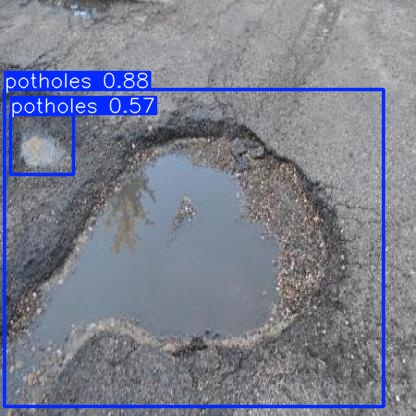

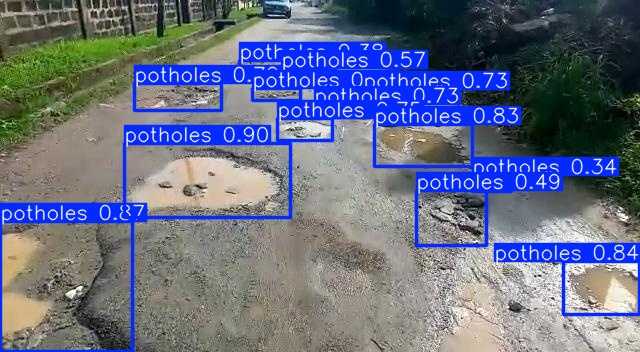

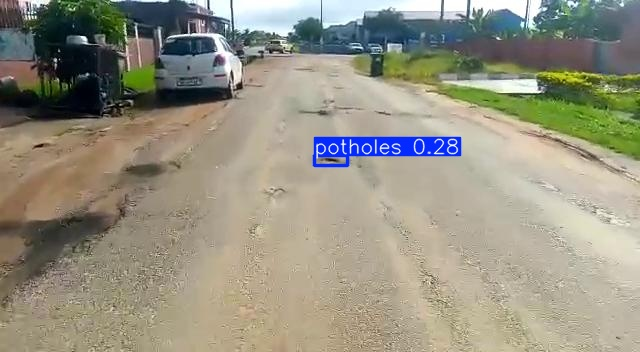

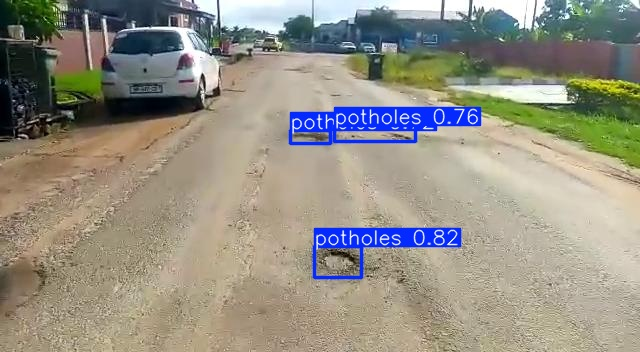

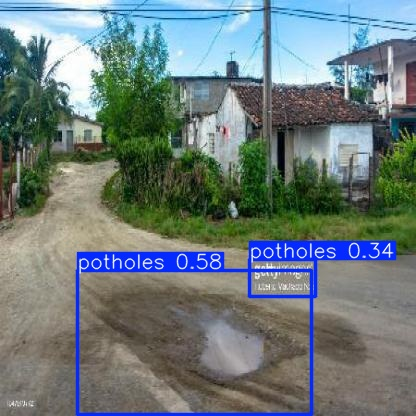

In [15]:
from IPython.display import Image, display
import os

PRED_PATH = "/kaggle/working/runs/detect/predict"

for img in os.listdir(PRED_PATH)[:5]:
    display(Image(filename=os.path.join(PRED_PATH, img)))
